In [56]:
import pandas as pd 
import numpy as np
import tensorflow as tf

In [57]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Churn_Modelling.csv')

In [58]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [59]:
y = df.iloc[:,-1].values

In [60]:
X = df.iloc[:,3:13].values

In [61]:
X[0]

array([619, 'France', 'Female', 42, 2, 0.0, 1, 1, 1, 101348.88],
      dtype=object)

In [62]:
from sklearn.preprocessing import LabelEncoder
LE1 = LabelEncoder()
X[:,2] = np.array(LE1.fit_transform(X[:,2]))

In [63]:
X[0]

array([619, 'France', 0, 42, 2, 0.0, 1, 1, 1, 101348.88], dtype=object)

In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [65]:
ct =ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder="passthrough")
X = np.array(ct.fit_transform(X))

In [66]:
X[0]

array([1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
      dtype=object)

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [75]:
def build_model(optimizer):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=6,activation="relu"))
  model.add(tf.keras.layers.Dense(units=6,activation="relu"))
  model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
  model.compile(optimizer=optimizer,loss="binary_crossentropy",metrics=['accuracy'])
  return model;


In [76]:
hist_list = []
optimizers = ['Adadelta', 'Adagrad', 'Adam', 'RMSprop', 'SGD']
for optimizer in optimizers:
  model = build_model(optimizer);
  hist=model.fit(X_train,Y_train,batch_size=32,epochs = 50,validation_data=(X_test,Y_test))
  hist_list.append(hist);


Epoch 1/50
250/250 [==============================] - 2s 7ms/step - loss: 0.7528 - accuracy: 0.3909 - val_loss: 0.7477 - val_accuracy: 0.4080
Epoch 2/50
250/250 [==============================] - 1s 6ms/step - loss: 0.7520 - accuracy: 0.3921 - val_loss: 0.7469 - val_accuracy: 0.4110
Epoch 3/50
250/250 [==============================] - 1s 5ms/step - loss: 0.7511 - accuracy: 0.3941 - val_loss: 0.7459 - val_accuracy: 0.4125
Epoch 4/50
250/250 [==============================] - 1s 4ms/step - loss: 0.7501 - accuracy: 0.3956 - val_loss: 0.7450 - val_accuracy: 0.4145
Epoch 5/50
250/250 [==============================] - 1s 3ms/step - loss: 0.7491 - accuracy: 0.3974 - val_loss: 0.7440 - val_accuracy: 0.4145
Epoch 6/50
250/250 [==============================] - 1s 3ms/step - loss: 0.7482 - accuracy: 0.3975 - val_loss: 0.7430 - val_accuracy: 0.4160
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.7471 - accuracy: 0.3999 - val_loss: 0.7420 - val_accuracy: 0.4170
Epoch 

In [77]:
print(hist_list)

[<keras.callbacks.History object at 0x7f1bdbc1e450>, <keras.callbacks.History object at 0x7f1bdba07d50>, <keras.callbacks.History object at 0x7f1bdb89a7d0>, <keras.callbacks.History object at 0x7f1bdb72fb90>, <keras.callbacks.History object at 0x7f1bd8fbcb90>]


In [78]:
import matplotlib.pyplot as plt

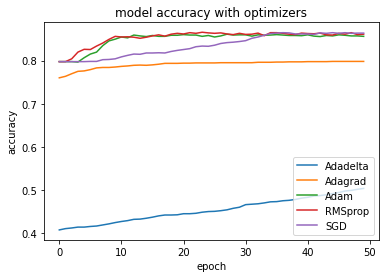

In [84]:
plt.title('model accuracy with optimizers')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.plot(hist_list[0].history['val_accuracy'])
plt.plot(hist_list[1].history['val_accuracy'])
plt.plot(hist_list[2].history['val_accuracy'])
plt.plot(hist_list[3].history['val_accuracy'])
plt.plot(hist_list[4].history['val_accuracy'])
plt.legend([optimizers[0],optimizers[1],optimizers[2],optimizers[3],optimizers[4]], loc='lower right')
plt.show()

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 0.5492 - accuracy: 0.7824
Epoch 2/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4776 - accuracy: 0.7976
Epoch 3/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4491 - accuracy: 0.8036
Epoch 4/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4352 - accuracy: 0.8061
Epoch 5/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4270 - accuracy: 0.8105
Epoch 6/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4211 - accuracy: 0.8138
Epoch 7/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4164 - accuracy: 0.8181
Epoch 8/50
250/250 [==============================] - 1s 2ms/step - loss: 0.4119 - accuracy: 0.8223
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4080 - accuracy: 0.8264
Epoch 10/50
250/250 [==============================] - 1s 4ms/step - loss: 0.4040 - accuracy: 0.8300

In [74]:
print(ann.predict(sc.transform([[1.0, 0.0, 1.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 101348.88]])) > 0.5)

1/1 [==============================] - 0s 55ms/step
[[False]]
